## 컨텐츠 기반 필터링 추천 시스템

In [ ]:
컨텐츠 기반 필터링 추천 시스템
- 사용자가 특정한 아이템을 매우 선호하는 경우
- 그 아이템과 비슷한 컨텐츠를 지닌 다른 아이템을 추천하는 방식
- 예: 특정 영화에 높은 평점을 주었다면
    - 그 영화의 장르, 출연 배우, 감독, 영화 키워드 등
    - 컨텐츠와 유사한 다른 영화 추천
    - 컨텍트 : 8점
    - 프로메테우스 : 9점
    - 컨텍트와 프로메테우스의 장르, 감독, 출연 배우, 키워드 등의 컨텐츠를 감안해서
    - 이와 유사한 영화 추천

In [ ]:
# 그림

In [ ]:
컨텐츠 기반 필터링 구현 프로세스  
(1) 컨텐츠에 대한 여러 텍스트 정보들을 피처 벡터화
(2) 코사인 유사도로 컨텐츠별 유사도 계산
(3) 컨텐츠별로 가중 평점 계산
(4) 유사도가 높은 컨텐츠 중에 평점이 좋은 컨텐츠 순으로 추천

In [ ]:
피처 벡터화
- 텍스트를 특정 의미를 가지는 숫자형 값인 벡터값으로 변환하는 것
- (머신러닝 알고리즘은 일반적으로 숫자형 피처를 데이터로 입력받아 동작
  - 텍스트 등의 데이터는 머신러닝 알고리즘에 바로 입력 불가하기 때문)
- 텍스트를 단어로 추출해 피처로 할당하고
- 각 단어의 발생 빈도와 같은 값을 피처에 부여해서
- 단어 피처의 발생 빈도 값으로 구성된 벡터로 만드는 기법
- 피처 벡터화는 기존 텍스트 데이터를 또 다른 형태의 피처 조합으로 변경하기 때문에
- 넓은 의미의 피처 추출에 포함

피처 벡터화 방식
- 카운트 기반의 벡터와
- TF-IDF(Term Frequency-Inverse Document Frequency) 기반의 벡터화


In [ ]:
카운트 기반의 벡터와
- 단어 피처에 값을 부여할 때 단어의 빈도수, 즉 Count를 부여하는 것
- 카운트 값이 높을수록 중요 단어로 인식

카운트 기반의 벡터와의 문제
- 카운트만 부여할 경우 그 단어의 특징을 나타내기 보다는
- 단어의 특성상 문장에서 자주 사용될 수 밖에 없는 단어까지 높은 값을 부여하게 됨
- 보완 --> TF-IDF 벡터화

TF-IDF(Term Frequency-Inverse Document Frequency) 기반의 벡터화
- 개별 문서에서 자주 나타나는 단어에 높은 가중치를 주되
- 모든 문서에서 전반적으로 자주 나타나는 단어에 대해서는 패널티를 주는 방식을 값 부여


- 어떤 문서에서 특정 단어가 자주 나타나면 그 단어는 해당 문서를 특징짓는 중요 단어일 수 있음
- 그러나 그 단어가 다른 문서에서도 자주 나타나는 단어라면 
- 해당 단어는 언어 특성상 범용적으로 자주 사용되는 단어일 가능성이 높음


- 예: 여러 뉴스 문서에서 '분쟁', '종교 대립', '유혈 사태' 같은 단어가 자주 나타나는 경우
- 해당 문서는 지역 분쟁과 관련된 뉴스일 가능성이 높고
- 해당 단어는 그 문서의 특징을 잘 나타낸다고 할 수 있음
- 그러나 '많은', '빈번하게', '당연히', '조직', '업무' 등과 같은 단어는
- 문서의 특징과 관련성이 적지만 보편적으로 많이 사용되기 때문에
- 문서에 반복적으로 사용될 가능성이 높음
- 이러한 단어는 단순히 등장하는 횟수에 따라 중요도로 평가받는다면 
- 문서를 특징짓기 어려움
- 따라서 모든 문서에서 반복적으로 자주 발생하는 단어에 대해서는
- 패널티를 부여하는 방식으로 단어에 대한 가중치의 균형을 맞춤
- 문서마다 텍스트가 길고 문서의 개수가 많은 경우
- 카운드 방식보다는 TF-IDF 방식을 사용하는 것이 더 좋은 예측 성능을 보장할 수 있음

In [ ]:
코사인 유사도
- 벡터와 벡터 간의 코사인 각도를 이용하여 유사도 산정하는 방식
- 즉, 두 벡터 사이의 사잇각을 구해서 얼마나 유사한지 수치로 적용한 것

In [ ]:
두 벡터의 방향이 
- 완전히 동일한 경우 : 1
- 90°: 0  (상관관계 없음)
- 180°: -1 (완전 반대)
    
피처 벡터 행렬은 음수값이 없으므로
- 코사인 유사도는 음수가 발생하지 않고
- 0 ~ 1 사이의 값으로
- 1에 가까울수록 유사도가 높다고 판단

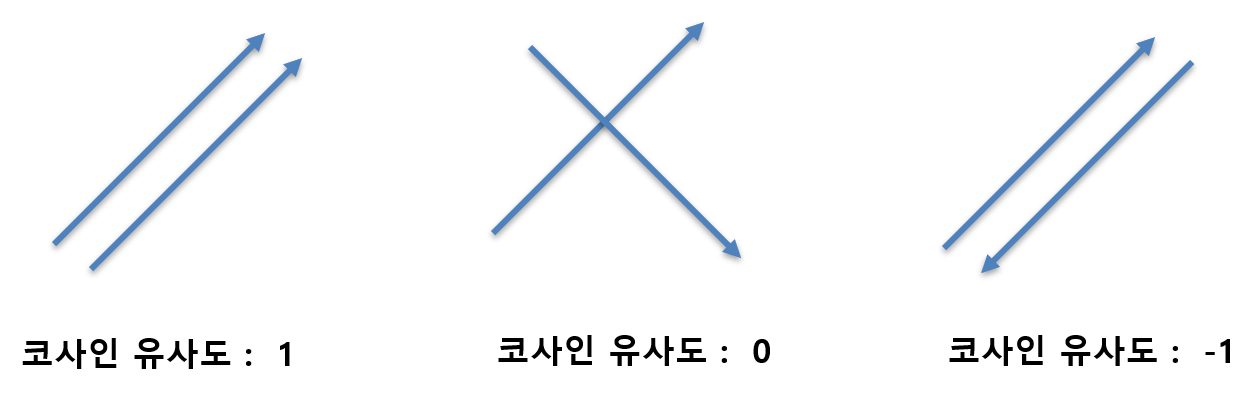

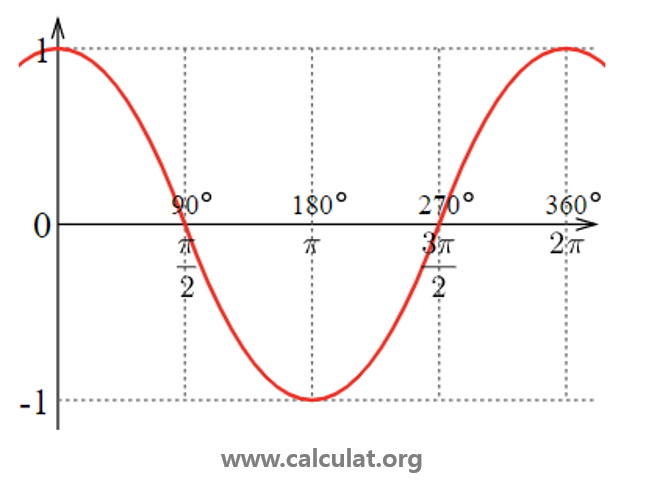

In [ ]:
예: 벡터값을 행렬로 표현하고
배열 A, B의 값을 수식에 적용해서 유사도 구함

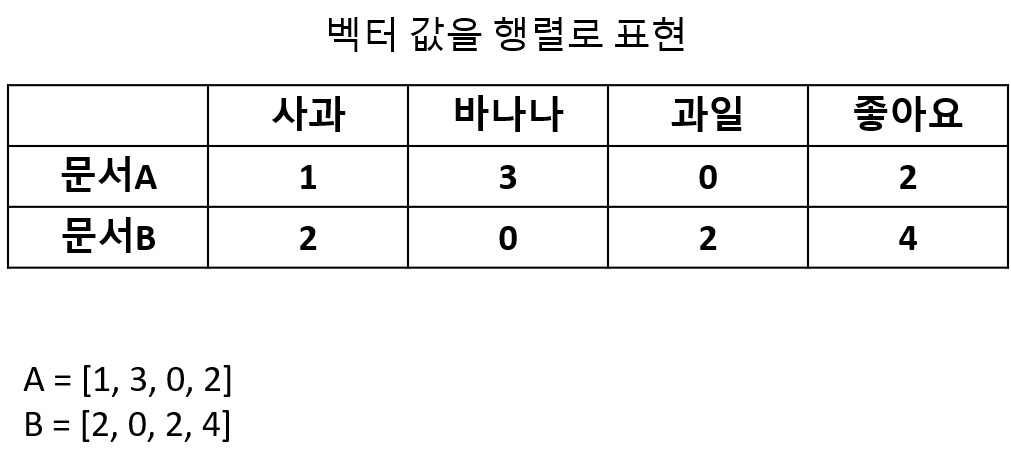

In [ ]:
사이킷런의 cosine_similarity() 함수를 이용해 코사인 유사도 계산  
cosine_similarity() 함수
- 기준 행과 비교 행의 코사인 유사도를 행렬 형태로 반환

### 컨텐츠 기반 필터링 예제

In [ ]:
사용 데이터
- TMDB 5000 영화 데이터 세트 사용
- 유명한 영화 데이터 정보 사이트인 IMDB의 많은 영화 중에서
- 주요 5000개 영화에 대한 메타 정보를 새롭게 가공해 캐글에서 제공하는 데이터 세트
- www.kaggle.com/tmdb/tmdb-movie-metadata
- tmdb_5000_movies.csv만 사용  

In [ ]:
수행 작업
- 영화를 선택하는 데 중요한 요소인 영화 장르 속성을 기반으로
- 장르와 유사도가 높은 영화를 추천하는 것으로 실습
(1) 장르 칼럼 값의 유사도를 비교한 뒤
(2) 그 중 높은 평점을 가지는 영화를 추천하는 방식

In [ ]:
컨텐츠 기반 필터링 예제 작업 순서
(1) 데이터 로드 및 가공
(2) 컨텐츠에 대한 여러 텍스트 정보들을 피처 벡터화
(3) 코사인 유사도로 컨텐츠별 유사도 계산
(4) 컨텐츠 별로 가중 평점 계산
(5) 유사도가 높은 컨텐츠 중에 평점이 좋은 컨텐츠 순으로 추천

### (1) 데이터 로드 및 가공

In [2]:
import pandas as pd
import numpy as np
import warnings; warnings.filterwarnings('ignore')

movies = pd.read_csv('./data/tmdb_5000_movies.csv')
print(movies.shape) # (4803, 20) : 4803개의 레코드와 20개의 피처로 구성
movies.head(1)

# 영화 제목, 개요, 인기도, 평점, 투표수, 예산, 키워드 등
# 영화에 대한 다양한 메타 정보를 포함

(4803, 20)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800


In [22]:
# 주요 칼럼 추출
# 평균 평점 : vote_average
# 평점 투표수 : vote_count

movies_df = movies[['id', 'title', 'genres', 'vote_average', 'vote_count', 'popularity', 'keywords', 'overview']]

In [23]:
# genres 데이터 확인
pd.set_option('max_colwidth', 100)
movies_df[['genres', 'keywords']][:1]

# 주의!
# 리스트 안에 여러 개의 딕셔너리 형태로 되어 있지만
# 데이터프레임 열의 값은 문자열
# 문자열을 객체로 변환 작업 필요

,genres,keywords
0,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp..."


In [15]:
# 데이터 타입 확인
movies_df.info() # object : 문자열

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4803 non-null   int64  
 1   title         4803 non-null   object 
 2   genres        4803 non-null   object 
 3   vote_average  4803 non-null   float64
 4   vote_count    4803 non-null   int64  
 5   popularity    4803 non-null   float64
 6   keywords      4803 non-null   object 
 7   overview      4800 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 300.3+ KB


In [ ]:
# 문자열을 리스트 객체로 변환
- 파이썬의 ast(abstract synthetic tree) 모듈의 literal_eval() 함수를 이용해서
- 문자열을 list 객체로 변환
- Series 객체의 apply() 함수에 literal_eval() 함수를 적용해 문자열을 객체로 변환

ast(abstract synthetic tree) 모듈
- 텍스트를 파싱해서 파이썬 객체로 생성

In [24]:
# genres 문자열 데이터를 리스트 객체로 변환
from ast import literal_eval

movies_df['genres'] = movies_df['genres'].apply(literal_eval)

In [25]:
movies_df['genres'] # 형태는 비슷하지만 각각이 파이썬 객체임

0       [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {...
1            [{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}]
2              [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 80, 'name': 'Crime'}]
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': ...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 878, 'name': 'Science Fic...
                                                       ...                                                 
4798            [{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 53, 'name': 'Thriller'}]
4799                                       [{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]
4800    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}, {'...
4801                        

In [26]:
# 장르 딕셔너리에서 name만 추출
movies_df['genres'] = movies_df['genres'].apply(lambda x: [y['name'] for y in x])

In [27]:
movies_df['genres'].head(1)

0    [Action, Adventure, Fantasy, Science Fiction]
Name: genres, dtype: object

In [28]:
# 키워드도 동일하게 문자열 리스트 객체보 변환
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)

In [31]:
# 장르와 키워드 1행만 출력
movies_df[['genres', 'keywords']][:1]

,genres,keywords
0,"[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa..."


### (2) 컨텐츠에 대한 여러 텍스트 정보들을 피처 벡터화

In [ ]:
장르 문자열의 Count 기반 피처 벡터화
- 리스트로 구성되어 있는 genres를 문자열로 변경한 뒤
- cont 기반 피처 벡터화 변환 (행렬로 변환)

In [34]:
# 리스트인 장르 칼럼을 문자열로 변환

from sklearn.feature_extraction.text import CountVectorizer

# CountVectorizer를 적용하기 위해 공백 문자로 단어 단위가 구분되는 문자열로 변환
# join() 메소드 사용해서 리스트의 각 원소들을 공백으로 결합해서 문자열로 변환
# [Action, Adventure, Fantasy, Science Fiction]
movies_df['genres_literal'] = movies_df['genres'].apply(lambda x : (' ').join(x))
count_vect = CountVectorizer(min_df=0, ngram_range=(1,2))
genre_mat = count_vect.fit_transform(movies_df['genres_literal'])
print(genre_mat.shape)

# ngram_range : 단어의 묶음
# ngram_range=(1,2) : 1개, 2개 단어 묶음 존재

# 결과
# 4803개의 레코드와  276 개의 개별 단어로 피처로 구성된
# 피처 벡터 행렬 생성됨

(4803, 276)


In [33]:
# join() 사용 예
# ('구분문자').join(리스트 객체)
# (' ').join(['test1', 'test2']) # 리스트 원소를 공백으로 연결한 문자열 반환
(' * ').join(['test1', 'test2'])

'test1 * test2'

In [35]:
# 참고
type(genre_mat)

scipy.sparse.csr.csr_matrix

In [36]:
genre_mat.toarray()[0]

array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [37]:
movies_df['genres_literal']

# [Action, Adventure, Fantasy, Science Fiction] 리스트가
# Action Adventure Fantasy Science Fiction : 공백으로 결합된 문자열로 변환

0       Action Adventure Fantasy Science Fiction
1                       Adventure Fantasy Action
2                         Action Adventure Crime
3                    Action Crime Drama Thriller
4               Action Adventure Science Fiction
                          ...                   
4798                       Action Crime Thriller
4799                              Comedy Romance
4800               Comedy Drama Romance TV Movie
4801                                            
4802                                 Documentary
Name: genres_literal, Length: 4803, dtype: object

### (3) 코사인 유사도로 컨텐츠별 유사도 계산

In [ ]:
장르에 따른 영화별 코사인 유사도 추출

In [40]:
# 사이킷런의 cosine_similarity() 함수 이용해서 코사인 유사도 계산

from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_mat, genre_mat)
print(genre_sim.shape)  # 유사도 행렬 크기
print(genre_sim[:5])    # 앞 5개만 출력

(4803, 4803)
[[1.         0.59628479 0.4472136  ... 0.         0.         0.        ]
 [0.59628479 1.         0.4        ... 0.         0.         0.        ]
 [0.4472136  0.4        1.         ... 0.         0.         0.        ]
 [0.12598816 0.16903085 0.3380617  ... 0.12598816 0.         0.        ]
 [0.75592895 0.3380617  0.50709255 ... 0.         0.         0.        ]]


In [ ]:
genre_sim
- movies_df의 'genres_literal' 칼럼을 피처 벡터화한
- 행렬 genre_mat 데이터의 행별 유사도정보를 가지고 있음
- 즉, movies_df 데이터프레임의 행렬 장르 유사도 값을 가지고 있음

movies_df를 장르 기준으로 컨텐츠 기반 필터링을 수행하려면
movies_df의 개별 레코드에 대해서
가장 장르 유사도가 높은 순으로 다른 레코드를 추출해야 하는데
이때 생성된 genre_sim 객체 사용

genre_sim 객체의 기준 행렬로 비교 대상이 되는 행의
유서도 값이 높은 순으로 정렬된 행렬의 위치 인덱스 값을 추출하면 됨

주의!!
값이 높은 순으로 정렬된 비교 대상 행의 유사도 값이 아니라
비교 대상 행의 위치 인텍스임에 주의
높은 순 (내림차순 정렬)

In [41]:
# argsort() : 배열을 오름차순 정렬하기 위한 index 값을 배열로 반환
import numpy as np
a = np.array([5, 9, 3, 7])
a

array([5, 9, 3, 7])

In [42]:
a.argsort() # 오름차순 정렬한 후 인덱스 값 반환

array([2, 0, 3, 1], dtype=int64)

In [43]:
# 내림차순 정렬한 index 값
a.argsort()[::-1]  # 값 : 9 7 5 3

array([1, 3, 0, 2], dtype=int64)

In [44]:
genre_sim.argsort()

array([[2401, 3037, 3038, ...,  813, 3494,    0],
       [2401, 3067, 3069, ...,  129,    1,  262],
       [2401, 2999, 3000, ..., 1542, 1740,    2],
       ...,
       [   0, 2230, 2229, ..., 1895, 3809, 4800],
       [   0, 3205, 3204, ..., 1596, 1594, 4802],
       [   0, 3141, 3140, ..., 4521, 4710, 4802]], dtype=int64)

In [45]:
# 행으로 내림차순 정렬
genre_sim.argsort()[::-1]

array([[   0, 3141, 3140, ..., 4521, 4710, 4802],
       [   0, 3205, 3204, ..., 1596, 1594, 4802],
       [   0, 2230, 2229, ..., 1895, 3809, 4800],
       ...,
       [2401, 2999, 3000, ..., 1542, 1740,    2],
       [2401, 3067, 3069, ...,  129,    1,  262],
       [2401, 3037, 3038, ...,  813, 3494,    0]], dtype=int64)

In [46]:
# 행은 그대로, 열로 내림차순 정렬
genre_sim.argsort()[:, ::-1]

array([[   0, 3494,  813, ..., 3038, 3037, 2401],
       [ 262,    1,  129, ..., 3069, 3067, 2401],
       [   2, 1740, 1542, ..., 3000, 2999, 2401],
       ...,
       [4800, 3809, 1895, ..., 2229, 2230,    0],
       [4802, 1594, 1596, ..., 3204, 3205,    0],
       [4802, 4710, 4521, ..., 3140, 3141,    0]], dtype=int64)

In [47]:
genre_sim.argsort()[:, ::-1][1]

array([ 262,    1,  129, ..., 3069, 3067, 2401], dtype=int64)

In [50]:
# 높은 순으로 정렬된(내림차순 정렬된) 비교 행 위치 인덱스 값 구해서
# 첫 번째(0번 레코드)의 비교 행 위치 인덱스 값만 샘플로 추출
genre_sim_sorted_ind = genre_sim.argsort()[:, ::-1]
print(genre_sim_sorted_ind[:1]) # [0]


# 결과
# [[   0 3494  813 ... 3038 3037 2401]]
# 0번 레코드의 경우 자신인 0번 레코들 제외하면
# 3494번 레코드가 가장 유사도가 높고
# 그 다음이 813 레코드이고, ...
# 가장 유사도가 낮은 레코드는 2401 레코드라는 의미

# 이제  genre_sim_sorted_ind 객체는
# 각 레코드의 장르 코사인 유사도가 가장 높은 순으로 정렬된
# 타 레코드의 위치 인덱스 값을 가지고 있음
# 이 위치 인덱스를 이용해서 언제든지 특정 레코드와 
# 코사인 유도가 높은 다른 레코드 추출 가능


[[   0 3494  813 ... 3038 3037 2401]]


In [ ]:
# 특정 영화와 장르별 유사도가 높은 영화를 반환하는 함수 생성

In [51]:
# 장르 유사도에 따라 영화를 추천하는 함수
# 파라미터 : 데이터프레임, 레코드별로 장르 코사인 유사도 인덱스,
#            영화제목, 추천할 영화 건수
# 반환 : 추천 영화 정보를 가지는 데이터프레임 반환

def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    # titile 데이터 추출
    title_movie = df[df['title'] == title_name]
    
    # title_name에 해당되는 데이터프레임 index 객체를 배열로 반환하고
    # 유사도 순으로 top_n개의 index 추출
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n)]
    
    # 추출된 top_n index 출력 
    # 2차원 데이터를 1차원 array로 변환
    print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    # index에 해당되는 데이터프레임 반환
    return df.loc[similar_indexes]

In [52]:
# 영화 '대부'와 장르별로 유사한 영화 10개 추천
similar_moview = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather', 10)
similar_moview[['title', 'vote_average']]

# 결과
# '대부 2편' 가장 먼저 추천
# '좋은 친구들'도 대부와 비슷한 유형
# 그러나 낯선 영화, 추천하기 어려운 영화, 평점이 낮은 영화 등 포함될 수 있음
# 좀 더 개선이 필요
# --> 영화의 평점에 다라 필터링해 최종 추천

[[2731 1243 3636 1946 2640 4065 1847 4217  883 3866]]


,title,vote_average
2731,The Godfather: Part II,8.3
1243,Mean Streets,7.2
3636,Light Sleeper,5.7
1946,The Bad Lieutenant: Port of Call - New Orleans,6.0
2640,Things to Do in Denver When You're Dead,6.7
4065,Mi America,0.0
1847,GoodFellas,8.2
4217,Kids,6.8
883,Catch Me If You Can,7.7
3866,City of God,8.1


### 평점 높은 영화 정보 확인

In [ ]:
영화의 평점에 따라 필터링해서 최종 추천
- 평점 vote_average 값 이용

평점 적용 시 주의점
- 0~10 점 만점 범위에서 여러 관객이 평가한 평점을 평균한 것인데
- 1~2명 소수의 관객이 특정 영화에 만점 또는 매우 높은 평점을 부여할 경우 
- 왜곡된 데이터가 포함될 수 있음

In [53]:
# 평점 기준으로 오름차순 정렬해서 확인
movies_df[['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False)[:10]

# 결과
# 1~2명 소수의 관객이 특정 영화에 만점 또는 매우 높은 평점을 부여해서 왜곡된 데이터 포함
# '쇼생크 탈출', '대부' 같은 명작보다 높은 평점을 받은 잘 알려지지 않은 영화 존재 (평가 횟수가 매우 낮은 영화)

# --> 왜곡된 평점 데이터를 피할수 있도록
# 평점에 평가 횟수를 반영할 수 있는 새로운 평가 방식 필요

,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4247,Me You and Five Bucks,10.0,2
4045,"Dancer, Texas Pop. 81",10.0,1
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2
2386,One Man's Hero,9.3,2
2970,There Goes My Baby,8.5,2
1881,The Shawshank Redemption,8.5,8205
2796,The Prisoner of Zenda,8.4,11
3337,The Godfather,8.4,5893


### (4) 컨텐츠 별로 가중 평점 계산

In [ ]:
IMDB(유명 영화 평점 사이트)
- 평가 횟수에 대한 가중치가 부여된 평점 방식 사용

평가 횟수에 대한 가중치가 부여된 평점 계산
가중 평점(Weighted Rating) = (v/(v+m)) * R + (m/(v+m)) * C

■ v: 개별 영화에 평점을 투표한 횟수 (vote_count)
■ m: 평점을 부여하기 위한 최소 투표 횟수
■ R: 개별 영화에 대한 평균 평점 (vote_average)
■ C: 전체 영화에 대한 평균 평점

In [ ]:
m 값
- 투표 횟수에 따를 가중치를 직접 조절하는 역할
- m 값을 높이면 평점 투표 횟수가 많은 영화에 더 많은 가중 평점 부여

In [54]:
# 참고
movies_df['vote_count'].max()

13752

In [55]:
movies_df['vote_count'].quantile(1) # 100% 기준인 경우

13752.0

In [57]:
movies_df['vote_count'].median()

235.0

In [56]:
movies_df['vote_count'].quantile(0.5) 

235.0

In [58]:
# C: 전체 영화에 대한 평균 평점
C = movies_df['vote_average'].mean()

#  m: 평점을 부여하기 위한 최소 투표 횟수
# 전체 투표 횟수에서 상위 60%에 해당하는 횟수를 기준으로 설정
# Series 객체의 quantile() 이용해서 추출
m = movies_df['vote_count'].quantile(0.6) 

print('C : ', round(C, 3), 'm : ', round(m, 3))

C :  6.092 m :  370.2


In [59]:
# 가중 평점 계산
percentile = 0.6
m = movies_df['vote_count'].quantile(percentile) 
C = movies_df['vote_average'].mean()

# 기존 평점을 새로운 가중 평점으로 변경하는 함수 생성
# vote_count, vote_average, m, C 값을 적용해서
# 레코드별 가중 평점 반환

def weighted_vote_average(record):
    v = record['vote_count']
    R = record['vote_average']
    
    return ( (v/(v+m)) * R ) + ( (m/(m+v)) * C )   

movies_df['weighted_vote'] = movies_df.apply(weighted_vote_average, axis=1) 

In [60]:
# 새롭게 가중 평점이 높은 순으로 상위 10개 영화 추출
movies_df[['title', 'vote_average', 'weighted_vote', 'vote_count']].sort_values('weighted_vote', ascending=False)[:10]

# 'weighted_vote' : 가중 평점

,title,vote_average,weighted_vote,vote_count
1881,The Shawshank Redemption,8.5,8.396052,8205
3337,The Godfather,8.4,8.263591,5893
662,Fight Club,8.3,8.216455,9413
3232,Pulp Fiction,8.3,8.207102,8428
65,The Dark Knight,8.2,8.136930,12002
1818,Schindler's List,8.3,8.126069,4329
3865,Whiplash,8.3,8.123248,4254
809,Forrest Gump,8.2,8.105954,7927
2294,Spirited Away,8.3,8.105867,3840
2731,The Godfather: Part II,8.3,8.079586,3338


### (5) 유사도가 높은 컨텐츠 중에 평점이 좋은 컨텐츠 순으로 추천

In [ ]:
새롭게 정의된 평점 기준에 따라 영화 추천
- 장르 유사성이 높은 영화를 top_n의 2배만큼 후보군으로 선정한 뒤
- weighted_vote' : 가중 평점 칼럼 값이 높은 순으로
- top_n 개만큼 추출하는 방식

In [61]:
# find_sim_movie() 수정 : 복사해서 변경

def find_sim_movie(df, sorted_ind, title_name, top_n=10):
    
    # 인자로 전달된 title에 해당되는 데이터 추출
    title_movie = df[df['title'] == title_name]
    
    # title_named을 가진 DataFrame의 index 객체를 ndarray로 반환하고 
    # sorted_ind 인자로 입력된 genre_sim_sorted_ind 객체에서 
    # top_n의 2배에 해당하는 쟝르 유사성이 높은 index 추출 
    title_index = title_movie.index.values
    similar_indexes = sorted_ind[title_index, :(top_n*2)]
    
    # 추출된 top_n index들 출력. top_n index는 2차원 데이터 임. 
    #dataframe에서 index로 사용하기 위해서 1차원 array로 변경
#     print(similar_indexes)
    similar_indexes = similar_indexes.reshape(-1)
    
    # 기준 영화 index는 제외 (자기(1)는 제외)
    similar_indexes = similar_indexes[similar_indexes != title_index]
    
    # top_n의 2배에 해당하는 후보군에서 weighted_vote 높은 순으로 top_n 만큼 추출 
    return df.iloc[similar_indexes].sort_values('weighted_vote', ascending=False)[:top_n]


similar_movies = find_sim_movie(movies_df, genre_sim_sorted_ind, 'The Godfather',10)
similar_movies[['title', 'vote_average', 'weighted_vote']]

# 결과
# 이전에 추천된 영화보다 훨씬 나은 영화가 추천됨
# 대부를 좋아하는 사람이라면 공감할 만한 '원스 어폰 어 타임 인 어메리카'가 추천됨
# 그러나 장르만으로 영화가 전달하는 많은 요소와 분위기, 개인이 좋아하는 성향 등을
# 반영하기에는 부족할 수 있음
# 좋아하는 배우나 감독을 보고 영화를 선택하는 경우다 더 많을 수 있음

# 갱스터 영화들이 많이 추천됨
# 앞에서 평점이 높더라도 유사도에 밀려 추천이 되지 않았지만
# 이번에는 평점순으로 정렬을 하니까
# 유사도가 낮더라도 사용자가 좀 더 공감할 수 있는 순으로 추천되었다고 할 수 있겠음

,title,vote_average,weighted_vote
2731,The Godfather: Part II,8.3,8.079586
1847,GoodFellas,8.2,7.976937
3866,City of God,8.1,7.759693
1663,Once Upon a Time in America,8.2,7.657811
883,Catch Me If You Can,7.7,7.557097
281,American Gangster,7.4,7.141396
4041,This Is England,7.4,6.739664
1149,American Hustle,6.8,6.717525
1243,Mean Streets,7.2,6.626569
2839,Rounders,6.9,6.530427
